In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img,cmap="gray")

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

# 20.1 理论基础

In [5]:
# 取k个邻近点，这k个邻近点中属于那一类的较多，就将当前待识别点划分到那一类，k取奇数
# 如已知双胞胎艺人A，B长得很像，要判断一张照片T到底是谁，用k近邻算法实现步骤：
# 1.收集A，B艺人照片各100张
# 2.确定几个用来识别人物的重要特征，并使用这些特征标注艺人A，B的照片，得到数据集FA，FB。如A:[156,34,890,457]
# 3.计算待识别图像特征，并使用特征值表示图像T。如T:[257,896,236,639]
# 4.计算图像T的特征值与FA，FB中各特征值的距离
# 5.找出其中k个最短距离的样本（离T最近的k个邻居），统计k个样本中属于FA，FB的样本点个数，哪个多，就将T确定为哪个人

# 20.2 计算

### 20.2.1 归一化

In [6]:
# 无量纲化，消除不同单位数值不能直接比较的影响
# 通常用每个数值除以最大值（或最大值与最小值的差）做归一化

### 20.2.2 距离计算

In [7]:
# 曼哈顿距离：
# 绝对值求和：d = ｜a-b｜+｜e-f｜
# 欧式距离：
# 平方和的平方根：d = √((a-b)^2+(e-f)^2)

# 20.3 手写数字识别

In [8]:
# 方法，计算手写数字8与0-9这十个已知数字的距离，哪个短是哪个

# 步骤：
# 1.特征提取
# 将手写数组图片分成8个区间，计算每个区间黑色像素点的个数，这样就采集到了4*4的特征值。将其写成一行数组形式，这样一行数组代笔一张图
# 2.数字识别
# 挨个计算手写数字8特征值与0-9数字图片之间的距离（对应位置做平方差，再将结果的和开根号：欧式距离），离哪个近分类为哪个

# 20.4 自定义手写数字识别

In [15]:
# opencv提供函数cv2.KNearest()用来实现K近邻算法
# 编写程序，演示K近邻算法

# 1.数据初始化
s = "image/"  # 图像所在路径
num = 100     # 共有特征值的数量
row = 240     # 特征图像行数
col = 240     # 特征图像列数
a = np.zeros((num,row,col))  # 用来存储所有特征值的值

# 2.读取特征图像
n = 0  # 用来存储当前图像的编号
for i in range(0,100):
    for j in range(1,11)
        a[n,:,:] = cv2.imread(s+str(i)+"/"+str(i)+"-"+"j"+".bmp",0)
        n += 1
        
# 3.提取特殊图像的特征值
# 计算每个子块内白色像素的数量
f = np.zeros((num,round(row/5),round(col/5)))  # f存储所有样本的特征值
for ni in range(0,num):
    for nr in range(0,row):
        for nc in range(0,col):
            if a[ni,nr,nc]==255:
                f[ni,int(nr/5),int(nc/5)] += 1
                
# 4.计算待识别图像的特征值
o = cv2.imread('rmage/test/9.bmp',0)
of = np.zeros((round(row/5),round(col/5)))  # of存储待识别图片的特征值
for nr in range(0,row):
    for nc in range(0,col):
        of[int(nr/5),int(nc/5)] +=1
        
# 5.计算待识别图像与特征图像之间的距离
d = np.zeros(100)
for i in range(0,100):
    d[i] = np.sum((of-f[i])**2)
    
# 6.获取k个最短距离及其索引
d = d.tolist()
temp = []
k = 7
for i in range(k):
    temp.append(d.index(min(d)))
    d[d.index(min(d))] = np.inf
    
# 7.识别
temp = [i/10 for i in temp]
r = np.zeros(10)  # 用来存储结果，r[0]表示“0”的个数
for i in temp:
    r[int[i]] += 1

# 20.5 K近邻模块的基本使用

当前随机数可判定为类型： [[0.]]
距离当前点最近的5个邻居： [[0. 0. 0. 0. 0.]]
5个最近邻居的距离： [[ 386.  745.  801.  850. 1053.]]


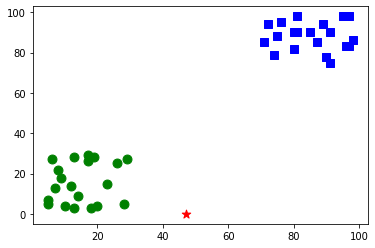

In [29]:
# 演示opencv自带的K近邻模块的使用方法

# 用于训练的数据
rand1 = np.random.randint(0,30,(20,2)).astype(np.float32)
rand2 = np.random.randint(70,100,(20,2)).astype(np.float32)
trainData = np.vstack((rand1,rand2))

# 数据标签：0和1
r1Label = np.zeros((20,1)).astype(np.float32)
r2Label = np.ones((20,1)).astype(np.float32)
tdLabel = np.vstack((r1Label,r2Label))

# 用绿色标注类型0,蓝色标注类型1
g = trainData[tdLabel.ravel()==0]
plt.scatter(g[:,0],g[:,1],80,"g",'o')
b = trainData[tdLabel.ravel()==1]
plt.scatter(b[:,0],b[:,1],80,"b",'s')

# test为用于测试的随机数对:（0,100）
test = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(test[:,0],test[:,1],80,'r','*')

# 调用opencv内K近邻模块训练
knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,tdLabel)

# 使用K近邻算法做分类
ret,results,neighbours,dist = knn.findNearest(test,5)

# 显示处理结果
print('当前随机数可判定为类型：',results)
print('距离当前点最近的5个邻居：',neighbours)
print('5个最近邻居的距离：',dist)
plt.show()

# 20.6 K近邻手写数字识别

In [30]:
s = 'image/'
num = 100
row = 240
col = 240
a = np.zeros((num,row,col))

# 读取样本图片
n = 0
for i in range(0,10):
    for j in range(1,11):
        a[n,:,:] = cv2.imread(s+str(i)+'/'+str(i)+'-'+str(j)+'.bmp',0)
        n += 1
        
# 提取样本图像特征
f = np.zeros((num,round(row/5),round(col/5)))
for ni in range(0,num):
    for nr in range(0,row):
        for nc in range(0,col):
            if a[ni,nr,nc] == 255:
                f[ni,int(nr/5),int(nc/5)] += 1  
                
train = f[:,:].reshape(-1,round(row/5)*round(col/5)).astype(np.float32)  # 整形，处理成单行形式

# 打标签
trainLabels = [int(i/10) for i in range(0,100)]
trainLabels = np.array(trainLabels)

# 读取待识别图像
o = cv2.imread('image/test/5.bpm',0)
of = np.zeros((round(row/5),round(col/5)))
for nr in range(0,row):
    for nc in range(0,col):
        if o[nr,nc] == 255:
            o[int(row/5),int(col/5)] += 1
            
test = of.reshape(-1,round(row/5)*round(col/5)).astype(np.float32)  # 整形，处理成单行形式

# 训练
knn = cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,trainabels)
# 预测
ret,result,neighbours,dist = knn.findNearest(test,k=5)

print('当前随机数可判定为类型：',results)
print('距离当前点最近的5个邻居：',neighbours)
print('5个最近邻居的距离：',dist)